In [30]:
from relu_network import ReLUNetwork
from tanh_network import TanhNetwork
from linear_network import LinearNetwork
import numpy as np 
from utils import get_lambda_balanced, get_random_regression_task
import matplotlib.pyplot as plt

In [19]:
in_dim = 5
hidden_dim = 5
out_dim = 5

batch_size = 5

lmda = 0.01

training_steps = 500
learning_rate = 0.01


def get_ws_trained(lmda):
    X, Y = get_random_regression_task(batch_size, in_dim, out_dim)
    init_w1, init_w2 = get_lambda_balanced(lmda, in_dim, hidden_dim, out_dim)

    relu = ReLUNetwork(in_dim, hidden_dim, out_dim, init_w1.copy(), init_w2.copy())
    w1s_relu, w2s_relu, _ = relu.train(X, Y, training_steps, learning_rate)

    tanh = TanhNetwork(in_dim, hidden_dim, out_dim, init_w1.copy(), init_w2.copy())
    w1s_tanh, w2s_tanh, _ = tanh.train(X, Y, training_steps, learning_rate)

    return w1s_tanh, w2s_tanh, w1s_relu, w2s_relu

In [20]:
lmdas = [-10, -5, -1, 0.01, 1, 5, 10]
ws_relu = dict()
ws_tanh = dict()

for lmda in lmdas:
    (w1s_tanh, w2s_tanh, w1s_relu, w2s_relu) = get_ws_trained(lmda)
    ws_tanh[lmda] = (w1s_tanh, w2s_tanh)
    ws_relu[lmda] = (w1s_relu, w2s_relu)

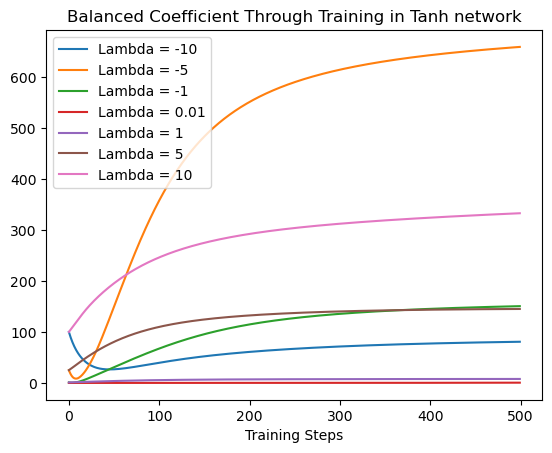

In [28]:
plt.figure()
plt.title('Balanced Coefficient Through Training in Tanh network')
plt.xlabel('Training Steps')
for lmda in lmdas:
    w1s_tanh, w2s_tanh = ws_tanh[lmda]
    balanced_tanh = [1/batch_size * np.linalg.norm(w2.T @ w2 - w1 @ w1.T)**2 for (w1, w2) in zip(w1s_tanh, w2s_tanh)]
    plt.plot(balanced_tanh, label=f'Lambda = {lmda}')

plt.legend()



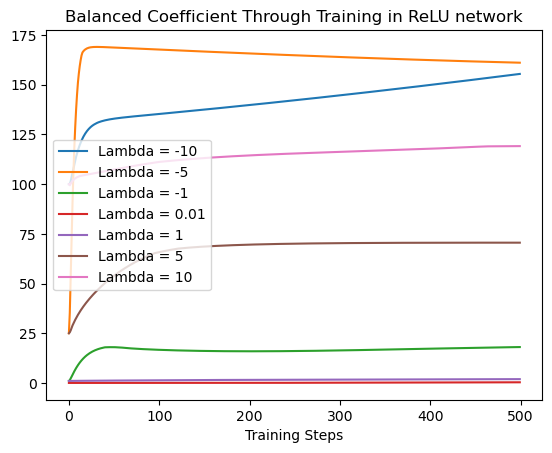

In [29]:
plt.figure()
plt.title('Balanced Coefficient Through Training in ReLU network')
plt.xlabel('Training Steps')
for lmda in lmdas:
    w1s_relu, w2s_relu = ws_relu[lmda]
    balanced_relu = [1/batch_size * np.linalg.norm(w2.T @ w2 - w1 @ w1.T)**2 for (w1, w2) in zip(w1s_relu, w2s_relu)]
    plt.plot(balanced_relu, label=f'Lambda = {lmda}')

plt.legend()



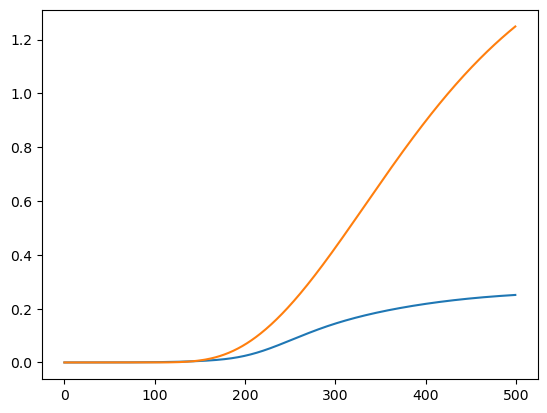

In [17]:
balanced_relu = [1/batch_size * np.linalg.norm(w2.T @ w2 - w1 @ w1.T)**2 for (w1, w2) in zip(w1s_relu, w2s_relu)]
balanced_tanh = [1/batch_size * np.linalg.norm(w2.T @ w2 - w1 @ w1.T)**2 for (w1, w2) in zip(w1s_tanh, w2s_tanh)]

plt.figure()
plt.plot(balanced_relu, label='ReLU')
plt.plot(balanced_tanh, label='Tanh')

In [38]:
X, Y = get_random_regression_task(batch_size, in_dim, out_dim)
init_w1, init_w2 = get_lambda_balanced(0.01, in_dim, hidden_dim, out_dim)

linear = LinearNetwork(in_dim, hidden_dim, out_dim, init_w1.copy(), init_w2.copy())
w1s, w2s, _ = linear.train(X, Y, training_steps, learning_rate)

losses = [1/(2*batch_size) * np.linalg.norm(w2 @ w1 @ X - Y , ord='fro')**2 for (w1, w2) in zip(w1s, w2s)]

losses_diffs = np.diff(losses)




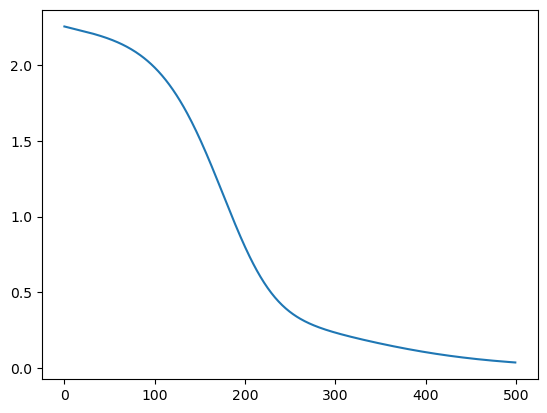

In [40]:
plt.plot(losses)

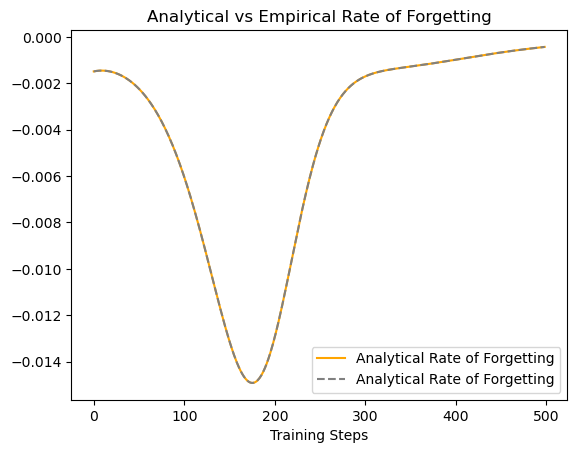

In [47]:

plt.figure()
plt.title('Analytical vs Empirical Rate of Forgetting')
plt.plot(losses_diffs, color='orange', label='Analytical Rate of Forgetting')
plt.plot(losses_diffs, linestyle='--', color='grey', label='Analytical Rate of Forgetting')
plt.xlabel('Training Steps')
plt.legend()